## Exercise 9

## Task 4

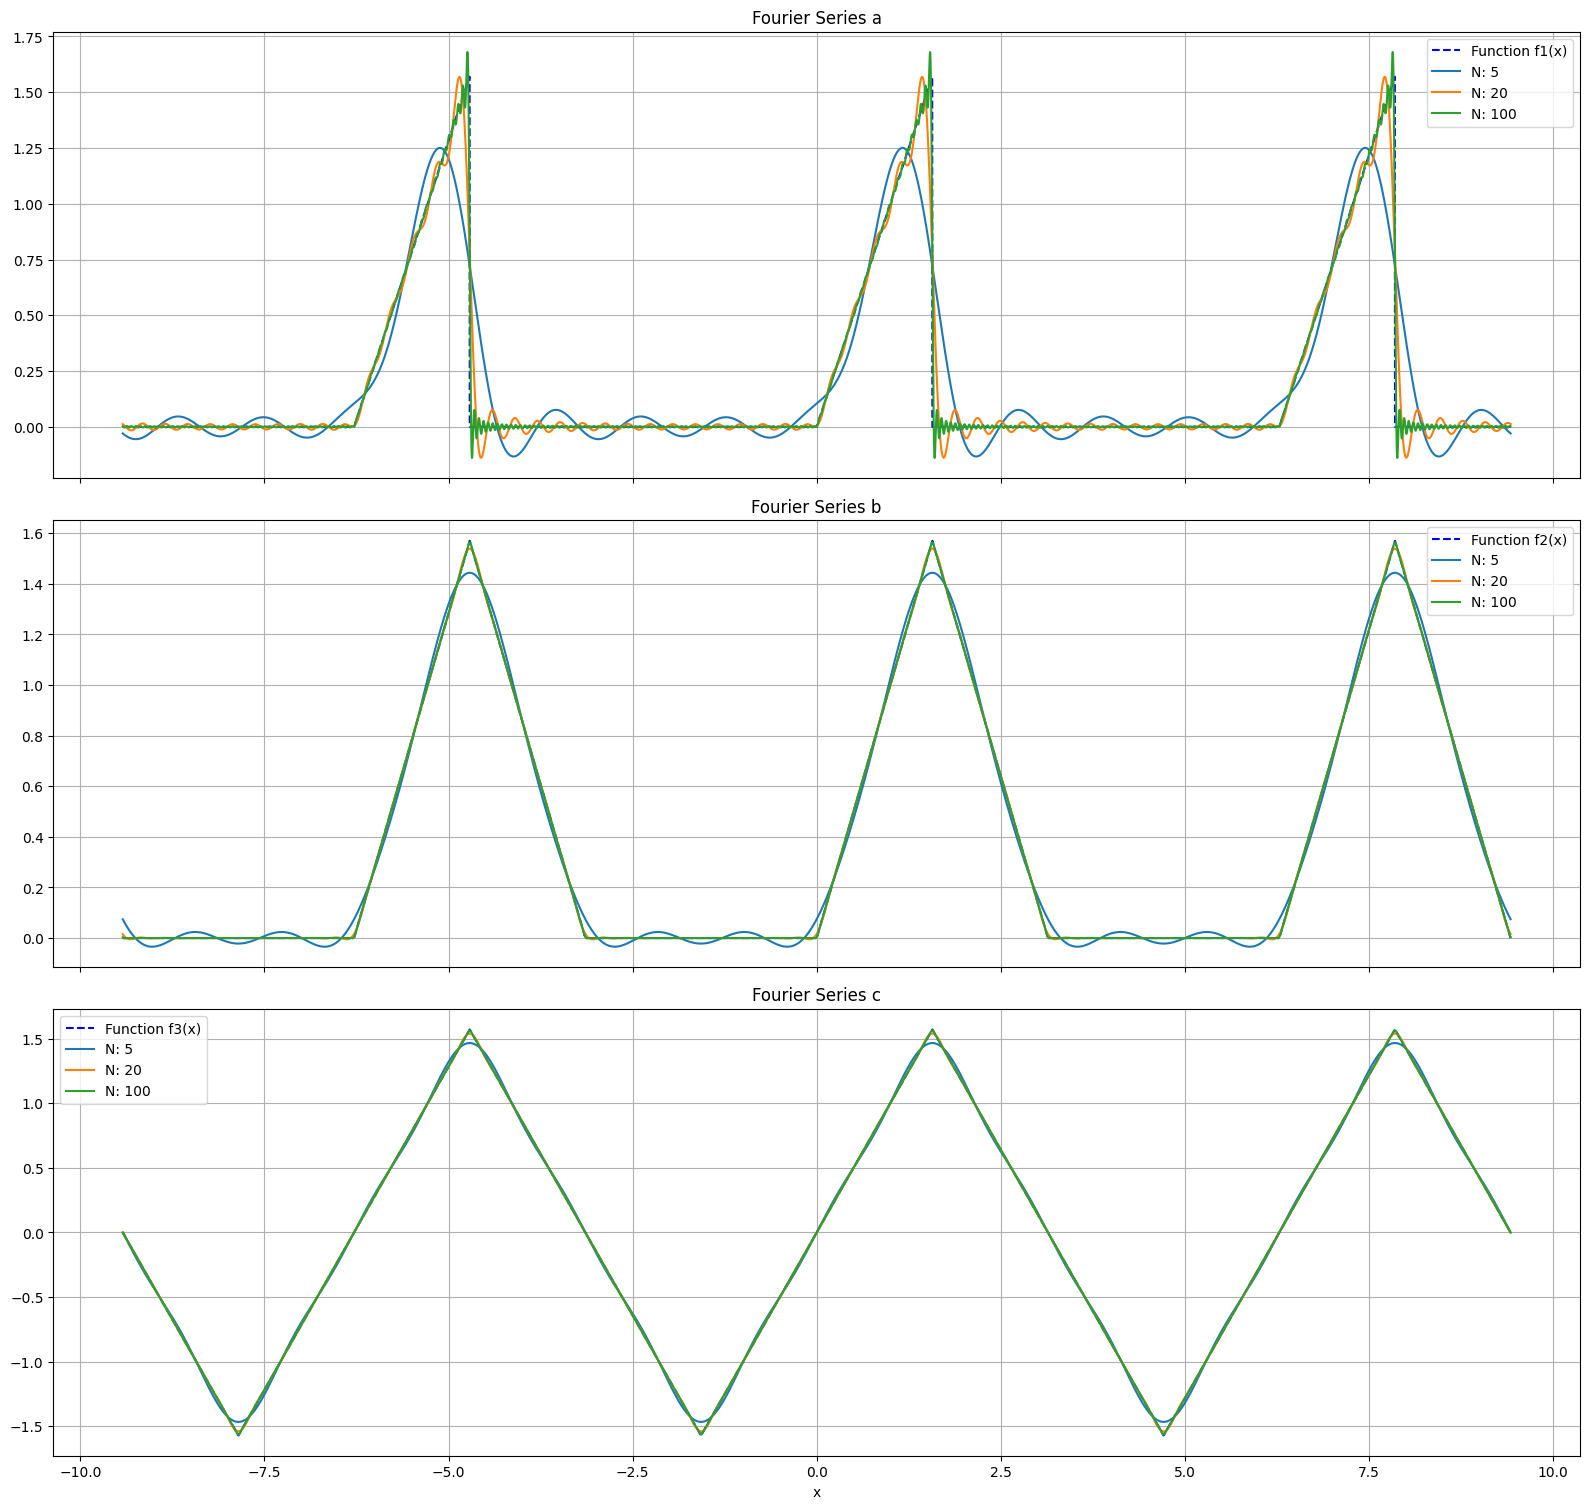

In [6]:
from functools import partial

import matplotlib.pyplot as plt
import numpy as np


def fourier_series(a0, an_func, bn_func, N, x):

    result = a0 / 2.0
    for n in range(1, N + 1):
        result += an_func(n) * np.cos(n * x) + bn_func(n) * np.sin(n * x)
    return result

def f1(x):
    x_mod = (x + np.pi) % (2 * np.pi) - np.pi
    return np.where((x_mod >= 0) & (x_mod <= np.pi / 2), x_mod, 0)


def f2(x):
    x_mod = (x + np.pi) % (2 * np.pi) - np.pi
    return np.piecewise(x_mod, [
        x_mod < 0, (x_mod >= 0) & (x_mod < np.pi / 2),
        (x_mod >= np.pi / 2) & (x_mod <= np.pi)
    ], [0, lambda x: x, lambda x: np.pi - x])


def f3(x):
    x_mod = (x + np.pi) % (2 * np.pi) - np.pi
    return np.piecewise(x_mod, [
        x_mod < -np.pi / 2, (x_mod >= -np.pi / 2) & (x_mod <= np.pi / 2),
        (x_mod > np.pi / 2) & (x_mod <= np.pi)
    ], [lambda x: -np.pi - x, lambda x: x, lambda x: np.pi - x])


a0_task_a = np.pi / 8


def an_task_a(n):
    return (np.pi * n * np.sin((np.pi * n) / 2) + 2 * np.cos(
        (np.pi * n) / 2) - 2) / (2 * np.pi * n**2)


def bn_task_a(n):
    return (-np.pi * n * np.cos((np.pi * n) / 2) + 2 * np.sin(
        (np.pi * n) / 2)) / (2 * np.pi * n**2)


a0_task_b = 2 * a0_task_a


def an_task_b(n):
    return ((2 * np.cos(
        (np.pi * n) / 2) - np.cos(np.pi * n) - 1)) / (np.pi * n**2)


def bn_task_b(n):
    return (2 * np.sin((np.pi * n) / 2) - np.sin(np.pi * n)) / (np.pi * n**2)

a0_task_c = 0


def an_task_c(_):
    return 0


def bn_task_c(n):
    return (4 * np.sin(
        (np.pi * n) / 2) - 2 * np.sin(np.pi * n)) / (np.pi * n**2)


x = np.linspace(-3 * np.pi, 3 * np.pi, 10_000)

fig, axs = plt.subplots(3, 1, figsize=(16, 15), sharex=True)
limits = [5, 20, 100]
# limits = [20, 1000]
# limits = [x for x in range(1, 1000, 100)]
axs[0].plot(x, f1(x), label='Function f1(x)', color='blue', linestyle='--')
axs[1].plot(x, f2(x), label='Function f2(x)', color='blue', linestyle='--')
axs[2].plot(x, f3(x), label='Function f3(x)', color='blue', linestyle='--')

for N in limits:
    y1 = fourier_series(a0_task_a, an_task_a, bn_task_a, N, x)
    y2 = fourier_series(a0_task_b, an_task_b, bn_task_b, N, x)
    y3 = fourier_series(a0_task_c, an_task_c, bn_task_c, N, x)
    axs[0].plot(x, y1, label=f'N: {N}')
    axs[1].plot(x, y2, label=f'N: {N}')
    axs[2].plot(x, y3, label=f'N: {N}')

axs[0].set_title('Fourier Series a')
axs[0].legend()
axs[0].grid(True)

axs[1].set_title('Fourier Series b')
axs[1].legend()
axs[1].grid(True)

axs[2].set_title('Fourier Series c')
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.xlabel('x')
plt.show()


